<ipython-input-4-139fc110aaa4>:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = daily_df["daily_cases"].resample("M").mean().reset_index()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-4-139fc110aaa4>:28: FutureWarning: 'M' is deprecated and will be removed in

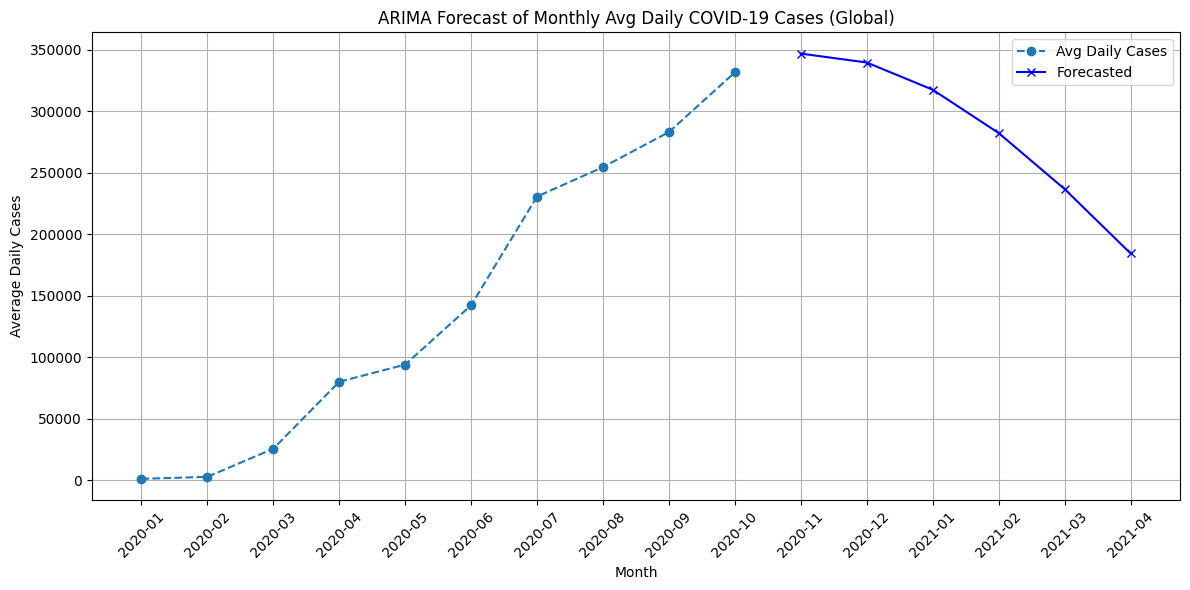


📅 Forecasted Monthly Average Daily Cases:
      month  forecasted_daily_cases
10  2020-11           346777.286476
11  2020-12           339519.962506
12  2021-01           317400.488482
13  2021-02           282191.054558
14  2021-03           236654.097896
15  2021-04           184325.772806


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv("/content/time-series-19-covid-combined.csv")

# Clean column names and parse date
df.columns = df.columns.str.strip()
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Group by date and compute daily new cases
daily_df = df.groupby(df.index).sum(numeric_only=True)
daily_df["daily_cases"] = daily_df["Confirmed"].diff()
daily_df = daily_df.dropna(subset=["daily_cases"])

# Resample monthly and calculate average daily cases per month
monthly_avg = daily_df["daily_cases"].resample("M").mean().reset_index()
monthly_avg["month"] = monthly_avg["Date"].dt.to_period("M").astype(str)

# Fit ARIMA model
model = ARIMA(monthly_avg["daily_cases"], order=(2, 0, 2))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)
future_months = pd.date_range(start=monthly_avg["Date"].max() + pd.DateOffset(months=1), periods=6, freq='M')
forecast_df = pd.DataFrame({"month": future_months.to_period("M").astype(str), "forecasted_daily_cases": forecast})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg["month"], monthly_avg["daily_cases"], label="Avg Daily Cases", marker='o', linestyle="--")
plt.plot(forecast_df["month"], forecast_df["forecasted_daily_cases"], label="Forecasted", color="blue", marker='x')
plt.xticks(rotation=45)
plt.title("ARIMA Forecast of Monthly Avg Daily COVID-19 Cases (Global)")
plt.xlabel("Month")
plt.ylabel("Average Daily Cases")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Print forecasted values
print("\n📅 Forecasted Monthly Average Daily Cases:")
print(forecast_df)
